In [449]:
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import pywt as wt

In [55]:
open_dat = pd.read_csv('open-closedat.csv')

In [1233]:
eeg = open_dat['Dev1/ai0'].to_numpy()
ecg = open_dat['Dev1/ai1'].to_numpy()

In [57]:
coeffs = wt.wavedec(eeg,'haar',level=4)

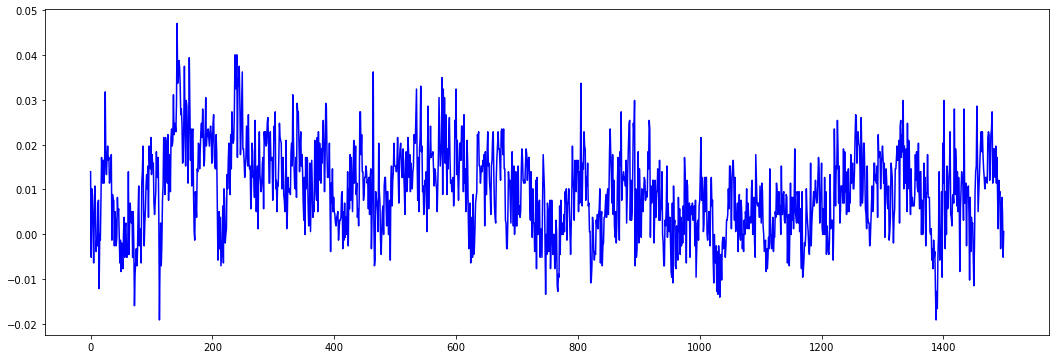

In [1290]:
#plt.plot(coeffs[0])
#plt.plot(coeffs[1])
plt.figure(figsize=(18,6))
plt.plot(eeg[500*5:500*8],'b')
#plt.plot(coeffs[2],'r')

In [59]:
len(coeffs[0])

5522

In [74]:
scale = np.arange(1,40)
coef, freqs =wt.cwt(eeg,scale,'morl')

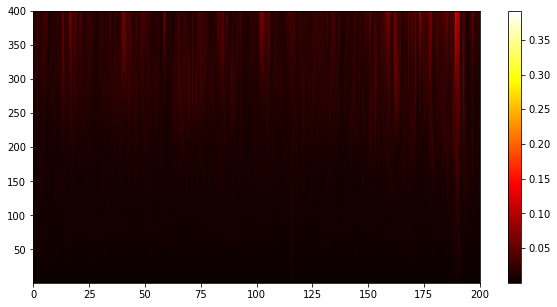

In [436]:
plt.figure(figsize=(10,5))
plt.imshow(abs(coef),extent=[0,200,400,1],interpolation='bilinear',cmap='hot',aspect='auto',vmax=abs(coef).max(), vmin= abs(coef).min())
plt.colorbar()
plt.gca().invert_yaxis()
#plt.yticks(np.arange(1,31,1))
#plt.xticks(np.arange(0,201,10))
plt.show()



In [1275]:
#Wavelet definition
frecm=500
fecx = 6.5
twav = np.linspace(-2,2,frecm*4)
#Sine wave
com_sin = np.exp(1j*2*np.pi*fecx*twav)
#Gauss wave
sigma = 9/(2*np.pi*fecx)
gauss_c = np.exp(-twav**2/(2*sigma**2))
#Morlet wavelet
wavelet_s = com_sin*gauss_c

Text(0.5, 1.0, 'Morlet wavelet parte real a 6.5 Hz')

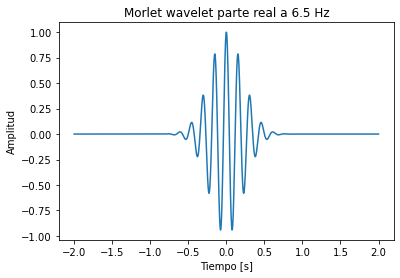

In [1276]:
plt.plot(twav,np.real(wavelet_s))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title(f'Morlet wavelet parte real a {fecx} Hz') 

Text(0.5, 1.0, 'Morlet wavelet parte imaginaria a 6.5 Hz')

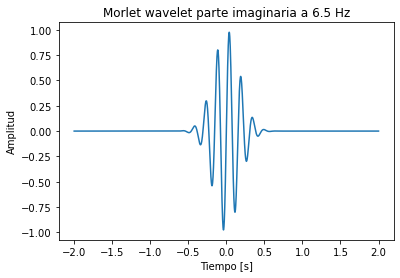

In [141]:
plt.plot(twav,np.imag(wavelet_s))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title(f'Morlet wavelet parte imaginaria a {fecx} Hz')

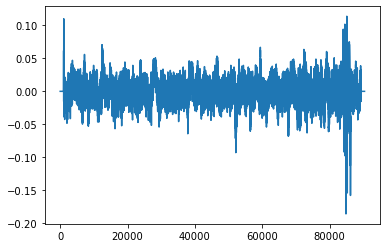

In [142]:
n,m = len(eeg), len(wavelet_s)
#pading
p = n+m-1
sig_pad = np.zeros(p)
for i in range(n):
    sig_pad[i+int(np.floor(m/2))] = eeg[i]
plt.plot(sig_pad)

In [126]:
conv = np.convolve(wavelet,eeg)

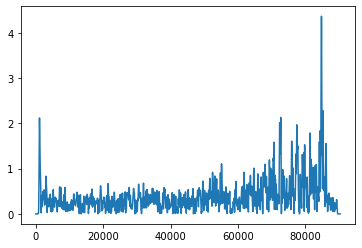

In [129]:
plt.plot(abs(conv))

In [550]:
def morlet(fecx,wide,freqm):
    frecm=freqm
    twav = np.linspace(-2,2,frecm*4)
#Sine wave
    com_sin = np.exp(1j*2*np.pi*fecx*twav)
#Gauss wave
    sigma = wide/(2*np.pi*fecx)
    gauss_c = np.exp(-twav**2/(2*sigma**2))
#Morlet wavelet
    wavelet = com_sin*gauss_c
    return wavelet

    

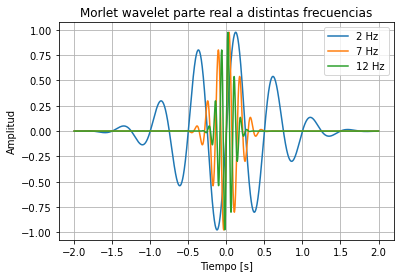

In [1147]:
freq_var = np.arange(2,15,5)
for i in freq_var:
    plt.plot(twav,np.imag(morlet(i,7,500)),label=f'{i} Hz')
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title(f'Morlet wavelet parte real a distintas frecuencias') 
plt.grid()
plt.show()

In [179]:
n,m = len(eeg), len(wavelet_s)
#Matriz padding
p = n+m-1
vec_frec = np.arange(1,41)
k = len(vec_frec)
matrx_pad = np.zeros([k,p])
matrx_pad.shape

(40, 90349)

In [182]:
#Matrix rewrite
for i in range(k):
    for q in range(n):
        matrx_pad[i][q+int(np.floor(m/2))] = eeg[q]
#plt.plot(matrx_pad[0])

In [746]:
def time_freq(sig,vfrec,wavelet,frecm):
    #Matrix padding
    n,m = len(sig),len(wavelet(vfrec[0],7,frecm))
    p = n+m+1
    k = len(vfrec)
    matrx_pad = np.zeros([k,p])
    #sig_fft = sc.fft(signal)
    for i in range(k):
        for q in range(n):
            matrx_pad[i][q+int(np.floor(m/2))] = sig[q]
    #Convolution
    conv_mat = np.zeros([k,n])
    aux_vec = []
    for i in range(k):
        for l in vfrec:
            aux_vec.append(np.convolve(matrx_pad[i],wavelet(l,7,frecm)))
            #aux_vec.append()
    for i in range(k):
        for q in range(n):
            conv_mat[i][q] = abs(aux_vec[i][q+int(np.floor(m/2))])
    return conv_mat,aux_vec
def db(matrix):
    k = len(matrix[0])
    l = len(matrix)
    for i in range(l):
        Vmax = abs(matrix[i]).max()
        for q in range(k):
            matrix[i][q] = 20*np.log10(abs(matrix[i][q])/Vmax)
    return matrix
           

In [776]:
vec_frec = np.arange(1,5,1)
Conv_mat, aux= time_freq(dummy,vec_frec,morlet,100)

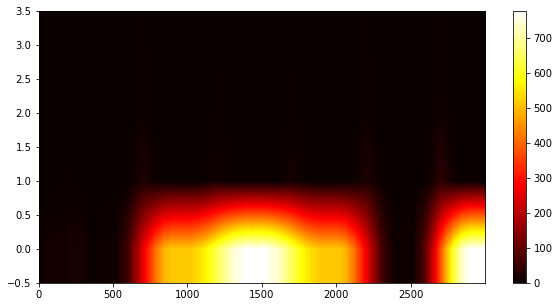

In [777]:
plt.figure(figsize=(10,5))
plt.imshow(abs(Conv_mat),interpolation='bilinear',aspect='auto',cmap='hot')
plt.colorbar()
plt.gca().invert_yaxis()
#plt.yticks(np.arange(1,12,2))
#plt.xticks(np.arange(0,10,1))
plt.show()

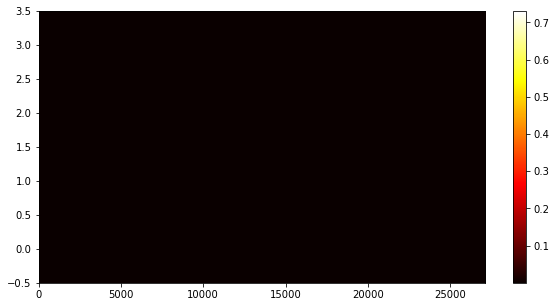

In [448]:
scale = np.arange(1,5)
coef_p, freqs_p =wt.cwt(s1,scale,'morl')

plt.figure(figsize=(10,5))
plt.imshow(abs(coef_p),interpolation='bilinear',cmap='hot',aspect='auto')
plt.colorbar()
plt.gca().invert_yaxis()
#plt.yticks(np.arange(1,31,1))
#plt.xticks(np.arange(0,201,10))
plt.show()



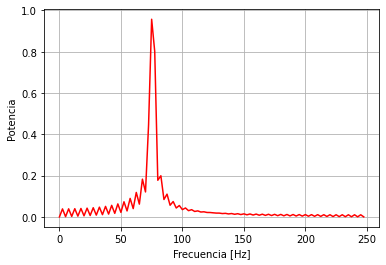

200

In [1153]:
t = np.linspace(0,1,100)
signal = np.sin(15*2*np.pi*t)
#signal = wavelet(15)
N = len(signal)
T = 1.0/500
yf = sc.fft.fft(signal,n =2*N)
xf = sc.fft.fftfreq(N*2, T)[:N*2//2]
plt.plot(xf, 2.0/(N) * np.abs(yf[:N*2//2]),c='red')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia')
#plt.xlim((0.1,20))
#plt.ylim((0,1))
plt.grid()
plt.show()
len(yf)

In [1154]:
def FFT(signal,freqm,xlim):
    import scipy as sc
    import matplotlib.pyplot as plt
    N = len(signal)
    T = 1.0/freqm
    signal_fft = sc.fft.fft(signal)
    frequen = sc.fft.fftfreq(N, T)[:N//2]
    plt.plot(frequen, 2.0/N * np.abs(signal_fft[:N//2]),c='red')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Potencia')
    plt.xlim([0.1,xlim])
    #plt.ylim([0,1])
    plt.grid()
    plt.title('Transformada de Fourier')
    plt.show()
    return

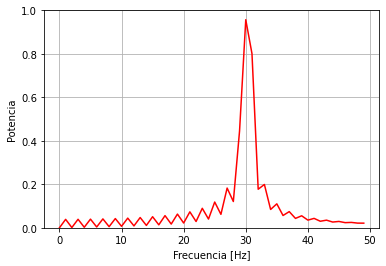

In [1034]:
t = np.linspace(0,1,100)
signal = np.sin(15*2*np.pi*t)
FFT(signal,100)

In [1342]:
def MRA(sig,fi,ff,freq_int,wavelet,freqm):
    #vect freq var
    range_cycles = [1,10] #barrido de número de ciclos
    delta = ff-fi #intervalo de frecuencias de descomposición
    num_frq = int(delta*(1/freq_int)) # número de frecuencias en que se descompone
    vfrec = np.linspace(fi,ff,num_frq) #vector de frecuencias
    num_cycles =np.logspace(np.log10(range_cycles[0]), np.log10(range_cycles[-1]),num_frq) #vector de ciclos
#     plt.plot(vfrec,num_cycles,'0-')
    
    #Preparation
    n,m = len(sig),len(wavelet(vfrec[0],range_cycles[0],freqm))
    p = n+m-1
    k = num_frq
    half_wav = int(np.floor(m/2))
    matrx_pad = np.zeros([k,p])
    sig_fft = sc.fft.fft(np.pad(sig,(0,p-n+1),'constant'))
    #Convolution
    conv_mat = np.zeros([k,n])
#     preconv_mat = np.zeros([k,n])
#     wavelet_mat = np.zeros([k,n])
    aux_vec = []
    for i in range(k):
        wave = np.pad(wavelet(vfrec[i],num_cycles[i],freqm), (0,n),'constant')
        wave_fft = sc.fft.fft(wave) 
        wave_fft = wave_fft / wave_fft.max()
#         wave_fft_prim = wave_fft[half_wav:-half_wav]
        conv_res_prim = np.multiply(sig_fft,wave_fft)
#         conv_res_sec = conv_res_prim[half_wav:-half_wav] #array producto FFTs
        conv_res = abs(sc.fft.ifft(conv_res_prim))**2 #resultado 
        conv_res = conv_res[half_wav:-half_wav] #recorte del padding
        for j in range(n):
            conv_mat[i][j] = conv_res[j]
#             preconv_mat[i][j] = conv_res_sec[j]
#             wavelet_mat[i][j] = wave_fft_prim[j]
#     T = 1/freqm
#     xfourier = sc.fft.fftfreq(p, T)[:p//2]
#     plt.plot(xfourier, 2.0/p * abs(conv_res_prim[:p//2]),c='black')
#     plt.plot(xfourier, 2.0/p * abs(wave_fft[:p//2]),c='orange')
#     plt.plot(xfourier, 2.0/p* abs(sig_fft[:p//2]),c='red')
    return conv_mat

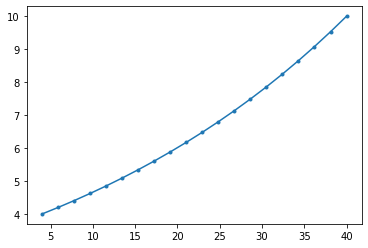

In [1064]:
fi = 4
ff = 40
num_frq= 20
range_cycles = [4,10]
vfrec = np.linspace(fi,ff,num_frq)
num_cycles =np.logspace(np.log10(range_cycles[0]), np.log10(range_cycles[-1]),num_frq)
plt.plot(vfrec,num_cycles,'.-')

Text(0, 0.5, 'Amplitud')

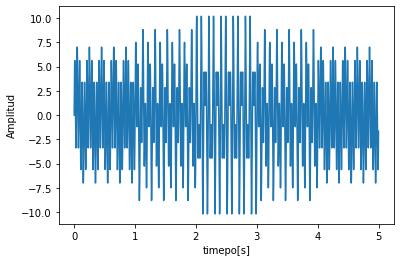

In [1188]:
frecm = 500
No = 500
time = np.arange(No) / float(frecm)
n_time = len(time)
noise = 5*np.sin(2*np.pi*25*time)
# s1 = 2*np.sin(2*np.pi*5*time)
# s2 = 4*np.sin(2*np.pi*10*time)
# s3 = 6*np.sin(2*np.pi*15*time)

s1 = 2*np.sin(2*np.pi*5*time)+noise
s2 = 4*np.sin(2*np.pi*10*time)+noise
s3 = 6*np.sin(2*np.pi*15*time)+noise
dummy = np.concatenate((s1,s2,s3,s2,s1))
time = np.linspace(0,5,5*500)
plt.plot(time,dummy)
plt.xlabel('timepo[s]')
plt.ylabel('Amplitud')

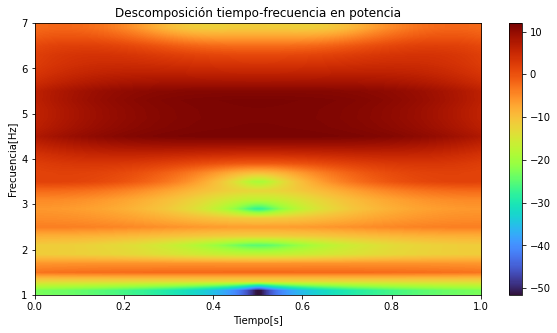

In [1103]:
fi = 1 #frecuencia inicial
ff =7 #frecuencia final
resf = 0.2 #resolución espectral
time_s = 1 #tiempo en segundos de la señal
test= MRA(s1,fi,ff,resf,morlet,500,0,0.5)
plt.figure(figsize=(10,5))
plt.imshow(test,extent=[0,time_s,ff,fi],interpolation='bilinear',aspect='auto',cmap='turbo')
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Tiempo[s]')
plt.ylabel('Frecuencia[Hz]')
plt.title('Descomposición tiempo-frecuencia en potencia normalizada a dB')
plt.show()

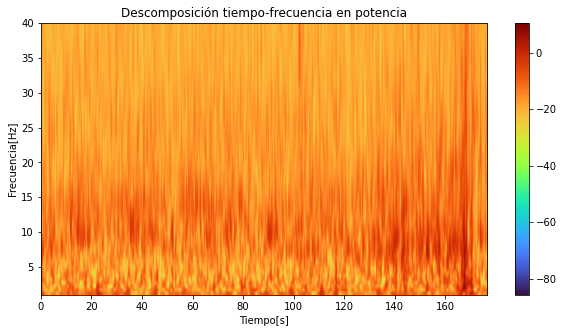

In [1104]:
fi = 1 #frecuencia inicial
ff =40 #frecuencia final
resf = 0.5 #resolución espectral
time_s = len(eeg)/500 #tiempo en segundos de la señal
test= MRA(eeg*100,fi,ff,resf,morlet,500,5,10)
plt.figure(figsize=(10,5))
plt.imshow(test,extent=[0,time_s,ff,fi],interpolation='bilinear',aspect='auto',cmap='turbo')
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Tiempo[s]')
plt.ylabel('Frecuencia[Hz]')
plt.title('Descomposición tiempo-frecuencia en potencia normalizada a dB')
plt.show()

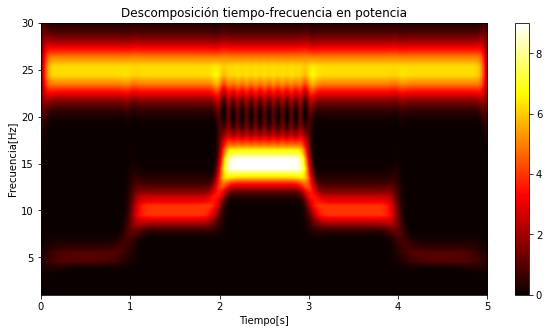

In [1189]:
fi = 1 #frecuencia inicial
ff = 30 #frecuencia final
resf = 0.2 #resolución espectral
time_s = 5 #tiempo en segundos de la señal
test= MRA(dummy,fi,ff,resf,morlet,500)
plt.figure(figsize=(10,5))
plt.imshow(test,extent=[0,time_s,ff,fi],interpolation='bilinear',aspect='auto',cmap='hot')
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Tiempo[s]')
plt.ylabel('Frecuencia[Hz]')
plt.title('Descomposición tiempo-frecuencia en potencia')
plt.show()

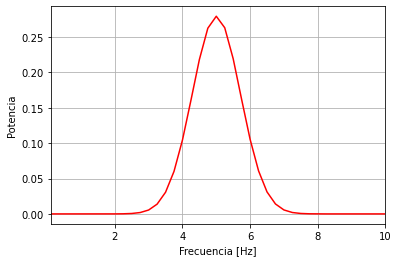

In [1155]:
FFT(morlet(5,7,500),500,10)

C:\Users\Andrew S\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


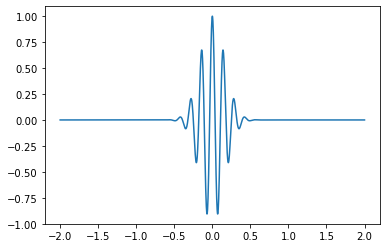

In [1150]:
t = np.linspace(-2,2,500*4)
plt.plot(t,np.real(morlet(7,7,500)))

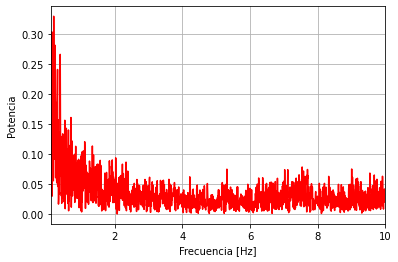

In [1177]:
FFT(100*eeg,500,10)

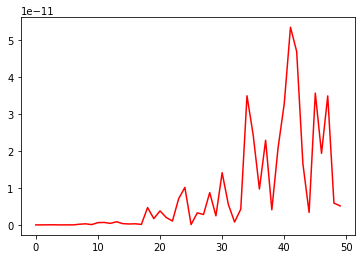

In [1172]:
y = sc.fft.fft(eeg)
T = 1/500.0
m= len(morlet(5,7,500))
n = len(eeg)
g = abs(m-len(y))
b = sc.fft.fft(np.pad(morlet(5,7,500),(0,g),'constant'))
res = np.multiply(b,y)
freq = sc.fft.fftfreq(N, T)[:N//2]
plt.plot(np.abs(res[:N//2])**2,'red')

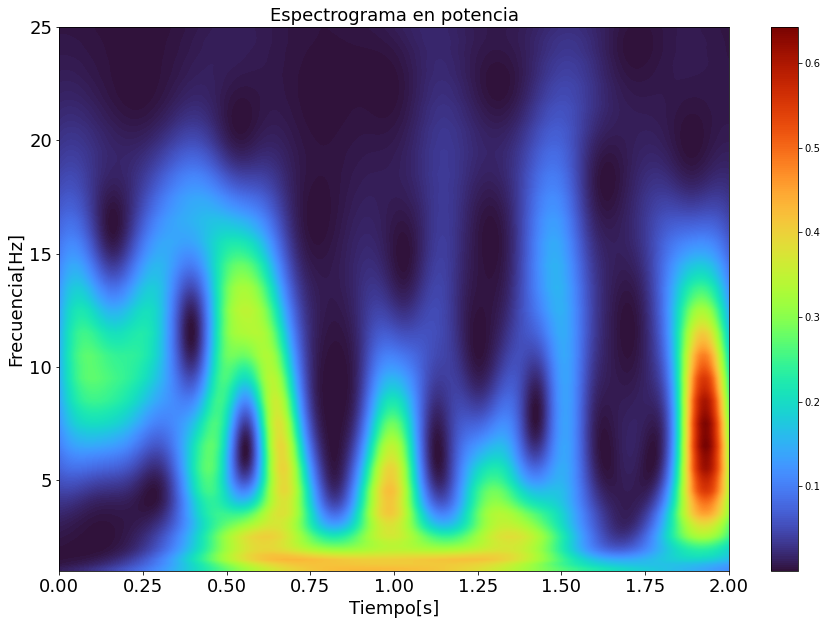

In [1343]:
fi = 1 #frecuencia inicial
ff = 25 #frecuencia final
resf = 0.2 #resolución espectral
time_s = 2 #tiempo en segundos de la señal
test= MRA(100*eeg[500*1:500*2],fi,ff,resf,morlet,500)
plt.figure(figsize=(15,10))
plt.imshow(test,extent=[0,time_s,ff,fi],interpolation='bilinear',aspect='auto',cmap='turbo')
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel('Tiempo[s]',fontsize =18)
plt.ylabel('Frecuencia[Hz]',fontsize =18)
plt.title('Espectrograma en potencia',fontsize =18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

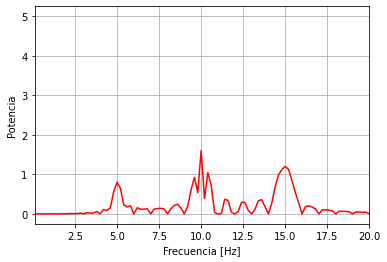

In [1191]:
FFT(dummy,500,20)

C:\Users\Andrew S\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


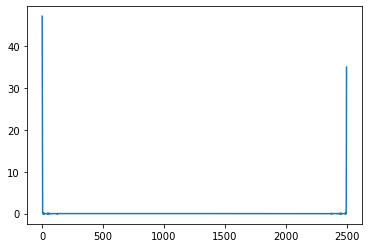

In [1195]:
plt.plot(sc.fft.fft(np.sqrt(test[0])))

In [1197]:
def MRA(sig,fi,ff,freq_int,wavelet,freqm):
    #Freq - cycles
    range_cycles = [4,10] #barrido de número de ciclos
    delta = ff-fi #intervalo de frecuencias de descomposición
    num_frq = int(delta*(1/freq_int)) # número de frecuencias en que se descompone
    vfrec = np.linspace(fi,ff,num_frq) #vector de frecuencias
    num_cycles =np.logspace(np.log10(range_cycles[0]), np.log10(range_cycles[-1]),num_frq) #vector de ciclos
    #Preparation
    n,m = len(sig),len(wavelet(vfrec[0],range_cycles[0],freqm))
    p = n+m+1
    k = num_frq
    half_wav = int(np.floor(m/2))
    matrx_pad = np.zeros([k,p])
    sig_fft = sc.fft.fft(np.pad(sig,(0,p-n),'constant'))
    #Convolution
    conv_mat = np.zeros([k,n])
    for i in range(k):
        wave = np.pad(wavelet(vfrec[i],num_cycles[i],freqm), (0,n+1),'constant')
        wave_fft = sc.fft.fft(wave) 
        wave_fft = wave_fft / wave_fft.max()
        conv_res_prim = np.multiply(sig_fft,wave_fft)
        conv_res = abs(sc.fft.ifft(conv_res_prim))**2 #resultado 
        conv_res = conv_res[half_wav:-half_wav] #recorte del padding
        for j in range(n):
            conv_mat[i][j] = conv_res[j]
    return conv_mat

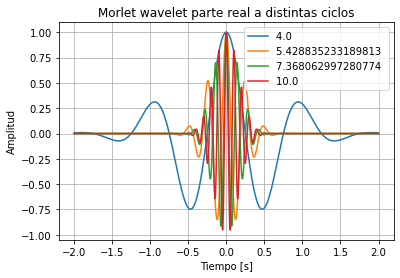

In [1231]:
fi = 1
ff = 10
freq_int = 2
range_cycles = [4,10] #barrido de número de ciclos
delta = ff-fi #intervalo de frecuencias de descomposición
num_frq = int(delta*(1/freq_int)) # número de frecuencias en que se descompone
vfrec = np.linspace(fi,ff,num_frq)
vfrec2 = np.zeros(num_frq)
for j in range(len(vfrec)):
    vfrec2[j] = 7
num_cycles =np.logspace(np.log10(range_cycles[0]), np.log10(range_cycles[-1]),num_frq) #vector de ciclos
for i in range(len(vfrec)):
    plt.plot(twav,np.real(morlet(vfrec[i],num_cycles[i],500)),label=f'{num_cycles[i]} ')
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title(f'Morlet wavelet parte real a distintas ciclos') 
plt.grid()
plt.show()

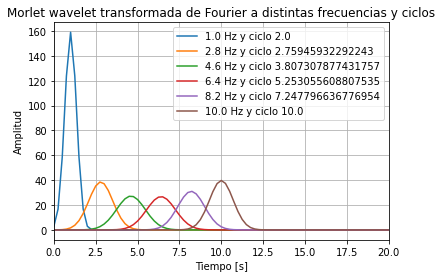

In [1229]:
fi = 1
ff = 10
freq_int = 1.5
range_cycles = [2,10] #barrido de número de ciclos
delta = ff-fi #intervalo de frecuencias de descomposición
num_frq = int(delta*(1/freq_int)) # número de frecuencias en que se descompone
vfrec = np.linspace(fi,ff,num_frq)
num_cycles =np.logspace(np.log10(range_cycles[0]), np.log10(range_cycles[-1]),num_frq) #vector de 
N = len((morlet(vfrec[0],num_cycles[0],500)))
T = 1/500
fwav = sc.fft.fftfreq(N, T)[:N//2]
for i in range(len(vfrec)):
    plt.plot(fwav, 2.0/N * abs(sc.fft.fft(morlet(vfrec[i],num_cycles[i],500))[:N//2])**2 ,label=f'{vfrec[i]} Hz y ciclo {num_cycles[i]}')
plt.legend()
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim([0,20])
plt.title(f'Morlet wavelet transformada de Fourier a distintas frecuencias y ciclos') 
plt.grid()
plt.show()

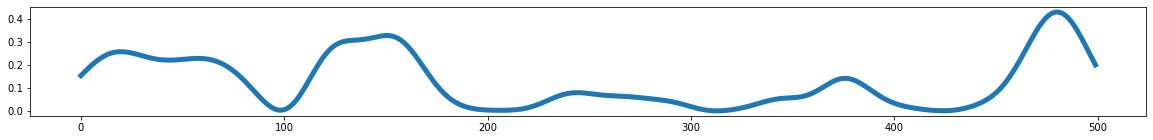

In [1322]:
plt.figure(figsize=(20,2))
plt.plot(test[50],linewidth=5)
plt.show()

In [1300]:
test.shape

(120, 500)